# Data Visualization
To understand the data better, we will visualize the data using different plots.
It will help us to understand the data distribution, correlation between features, and many more.

## Importing Libraries

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

## Read the commodities from json file

In [86]:
# Commodities is a dict of commodity_name : [..markets..]
with open('commodities.json') as f:
    COMMODITIES = json.load(f)
print(COMMODITIES)

def get_file_path(commodity_name, market_name):
    return f'./raw_data/{commodity_name.upper()}/krama_report_{market_name.lower()}.csv'
print(get_file_path('Wheat', 'Bengaluru'))

{'RICE': ['BENGALURU', 'BIDAR', 'MYSURU', 'SHIVAMOGGA'], 'WHEAT': ['BENGALURU', 'BIDAR', 'HUBBALLI', 'MYSURU', 'SHIVAMOGGA'], 'GROUNDNUT': ['BENGALURU', 'MYSURU', 'YADGIR'], 'GREEN PEAS': ['BENGALURU', 'MYSURU', 'SHIVAMOGGA'], 'TUR DAL': ['BENGALURU', 'MYSURU', 'SHIVAMOGGA']}
./raw_data/WHEAT/krama_report_bengaluru.csv


## Understanding the data
Let's first load the data and understand the data better.

In [87]:
# Lets load all commodities data for Bengaluru market and concatenate them
bengaluru_df = pd.DataFrame()
for commodity in COMMODITIES:
    file_path = get_file_path(commodity, 'Bengaluru')
    try:
        df = pd.read_csv(file_path, encoding_errors='ignore')
        df['Commodity'] = commodity
        bengaluru_df = pd.concat([bengaluru_df, df])
    except FileNotFoundError:
        print(f'File not found: {file_path}')
# Reset index
bengaluru_df.reset_index(drop=True, inplace=True)
bengaluru_df.head()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District,Commodity
0,BENGALURU,01/01/2021,MEDIUM,AVERAGE,17976,Quintal,4000,4400,4200,Bengaluru Urban,RICE
1,BENGALURU,02/01/2021,MEDIUM,AVERAGE,15170,Quintal,4000,4400,4200,Bengaluru Urban,RICE
2,BENGALURU,04/01/2021,MEDIUM,AVERAGE,20087,Quintal,4000,4400,4200,Bengaluru Urban,RICE
3,BENGALURU,05/01/2021,MEDIUM,AVERAGE,21127,Quintal,4000,4400,4200,Bengaluru Urban,RICE
4,BENGALURU,06/01/2021,MEDIUM,AVERAGE,18338,Quintal,4000,4400,4200,Bengaluru Urban,RICE


In [88]:
bengaluru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Market     3879 non-null   object
 1   Date       3879 non-null   object
 2   Variety    3879 non-null   object
 3   Grade      3879 non-null   object
 4   Arrivals   3879 non-null   int64 
 5   Unit       3879 non-null   object
 6   Min        3879 non-null   int64 
 7   Max        3879 non-null   int64 
 8   Modal      3879 non-null   int64 
 9   District   3879 non-null   object
 10  Commodity  3879 non-null   object
dtypes: int64(4), object(7)
memory usage: 333.5+ KB


In [89]:
# Lets load all markets data for Rice commodity and concatenate them
rice_df = pd.DataFrame()
for market in COMMODITIES['RICE']:
    file_path = get_file_path('Rice', market)
    try:
        df = pd.read_csv(file_path, encoding_errors='ignore')
        df['Market'] = market
        rice_df = pd.concat([rice_df, df])
    except FileNotFoundError:
        print(f'File not found: {file_path}')
# Reset index
rice_df.reset_index(drop=True, inplace=True)
rice_df.tail()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
5830,SHIVAMOGGA,26/12/2023,MEDIUM,AVERAGE,286,Quintal,2800,4500,3650,Shivamogga
5831,SHIVAMOGGA,27/12/2023,MEDIUM,AVERAGE,145,Quintal,2800,4500,3700,Shivamogga
5832,SHIVAMOGGA,28/12/2023,MEDIUM,AVERAGE,126,Quintal,2800,4500,3700,Shivamogga
5833,SHIVAMOGGA,29/12/2023,MEDIUM,AVERAGE,96,Quintal,2800,4500,3700,Shivamogga
5834,SHIVAMOGGA,30/12/2023,MEDIUM,AVERAGE,50,Quintal,2800,4500,3700,Shivamogga


In [90]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Market    5835 non-null   object
 1   Date      5835 non-null   object
 2   Variety   5835 non-null   object
 3   Grade     5835 non-null   object
 4   Arrivals  5835 non-null   int64 
 5   Unit      5835 non-null   object
 6   Min       5835 non-null   int64 
 7   Max       5835 non-null   int64 
 8   Modal     5835 non-null   int64 
 9   District  5835 non-null   object
dtypes: int64(4), object(6)
memory usage: 456.0+ KB


In [91]:
# Lets load all markets data for Green Peas commodity and concatenate them
green_peas_df = pd.DataFrame()
for market in COMMODITIES['GREEN PEAS']:
    file_path = get_file_path('Green Peas', market)
    try:
        df = pd.read_csv(file_path, encoding_errors='ignore')
        df['Market'] = market
        green_peas_df = pd.concat([green_peas_df, df])
    except FileNotFoundError:
        print(f'File not found: {file_path}')
# Reset index
green_peas_df.reset_index(drop=True, inplace=True)
green_peas_df[-5:]

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
868,SHIVAMOGGA,10/11/2023,GREEN PEAS,AVERAGE,5,Quintal,6800,9500,8150,Shivamogga
869,SHIVAMOGGA,17/11/2023,GREEN PEAS,AVERAGE,10,Quintal,5500,9500,7500,Shivamogga
870,SHIVAMOGGA,18/11/2023,GREEN PEAS,AVERAGE,7,Quintal,5500,9500,7500,Shivamogga
871,SHIVAMOGGA,20/11/2023,GREEN PEAS,AVERAGE,5,Quintal,5500,9500,7500,Shivamogga
872,SHIVAMOGGA,21/11/2023,GREEN PEAS,AVERAGE,9,Quintal,5500,9500,7500,Shivamogga


## Date Time Conversion

In [92]:
# Convert the date column to datetime
all_df = [bengaluru_df, rice_df, green_peas_df]
for df in all_df:
    df['Date'] = pd.to_datetime(df['Date'], format=r'%d/%m/%Y')
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
bengaluru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Market     3879 non-null   object        
 1   Date       3879 non-null   datetime64[ns]
 2   Variety    3879 non-null   object        
 3   Grade      3879 non-null   object        
 4   Arrivals   3879 non-null   int64         
 5   Unit       3879 non-null   object        
 6   Min        3879 non-null   int64         
 7   Max        3879 non-null   int64         
 8   Modal      3879 non-null   int64         
 9   District   3879 non-null   object        
 10  Commodity  3879 non-null   object        
 11  Day        3879 non-null   int32         
 12  Month      3879 non-null   int32         
 13  Year       3879 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(4), object(6)
memory usage: 378.9+ KB


## Unique Values
Let check the number of unique values in each column.

Market          1
Date          795
Variety         7
Grade           1
Arrivals     2404
Unit            1
Min            82
Max            91
Modal         168
District        1
Commodity       5
Day            31
Month          12
Year            3
dtype: int64

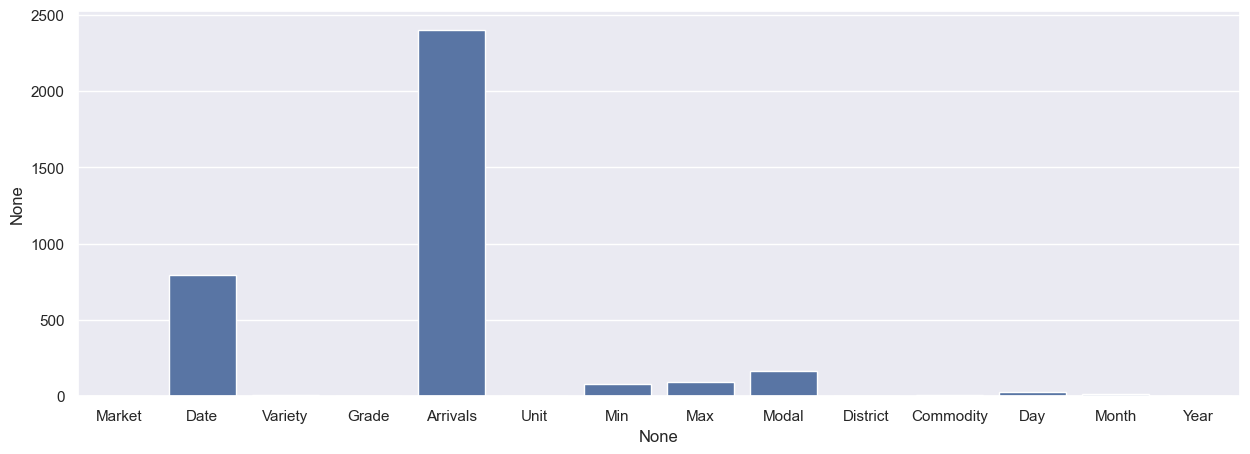

In [93]:
# plot unique values in the columns
sns.set_theme(rc={'figure.figsize':(15, 5)})
sns.barplot(x=bengaluru_df.columns, y=bengaluru_df.nunique())
bengaluru_df.nunique()

We can see that the Market, Unit and District columns have only 1 Value throughout the dataset. So we can drop these columns for further analysis.

In [94]:
dropped_columns = ['Unit', 'District']
for df in all_df:
    df.drop(columns=dropped_columns, inplace=True)
bengaluru_df.head()

,Market,Date,Variety,Grade,Arrivals,Min,Max,Modal,Commodity,Day,Month,Year
0,BENGALURU,2021-01-01,MEDIUM,AVERAGE,17976,4000,4400,4200,RICE,1,1,2021
1,BENGALURU,2021-01-02,MEDIUM,AVERAGE,15170,4000,4400,4200,RICE,2,1,2021
2,BENGALURU,2021-01-04,MEDIUM,AVERAGE,20087,4000,4400,4200,RICE,4,1,2021
3,BENGALURU,2021-01-05,MEDIUM,AVERAGE,21127,4000,4400,4200,RICE,5,1,2021
4,BENGALURU,2021-01-06,MEDIUM,AVERAGE,18338,4000,4400,4200,RICE,6,1,2021


## Distribution by Variety and Grade

The distribution of grades by variety and vareity by grades in Bengaluru


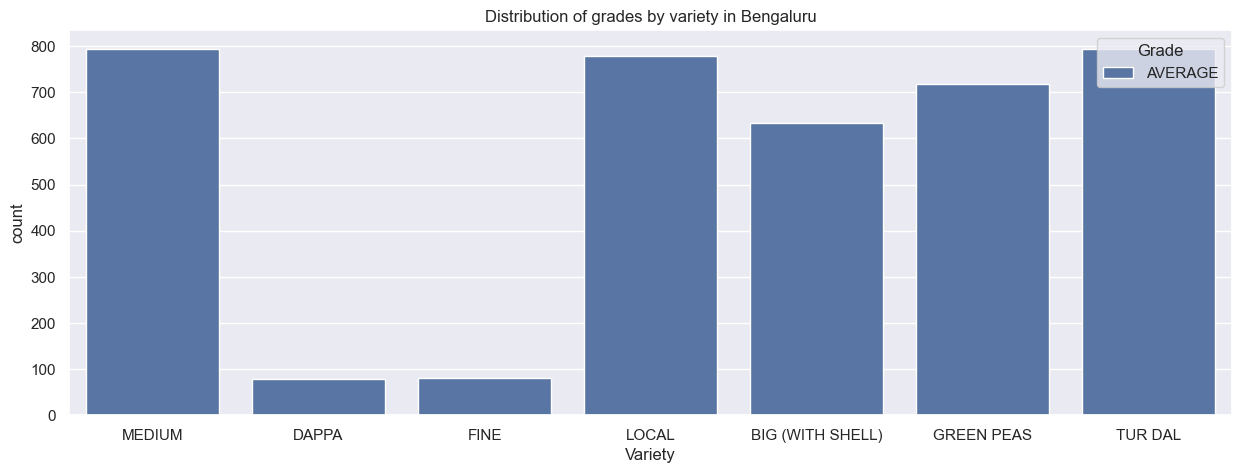

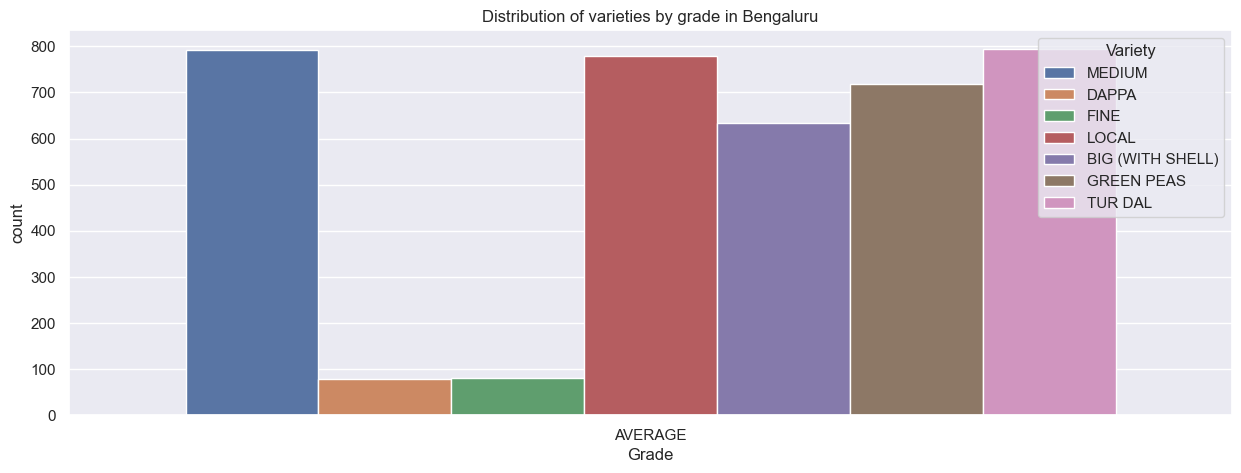

In [95]:
# PLotting the distribution by variety and grade
def plot_distribution(df, market):
    print('The distribution of grades by variety and vareity by grades in', market)
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.countplot(x='Variety', data=df, hue='Grade')
    plt.title(f'Distribution of grades by variety in {market}')
    plt.show()
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.countplot(x='Grade', data=df, hue='Variety')
    plt.title(f'Distribution of varieties by grade in {market}')
    plt.show()
    
plot_distribution(bengaluru_df, 'Bengaluru')

Through the graphs we can observe that the varieties bellary red and onion come in a range of grades and majority of the commodities are of grade Average.

The distribution of grades by variety and vareity by grades in Rice


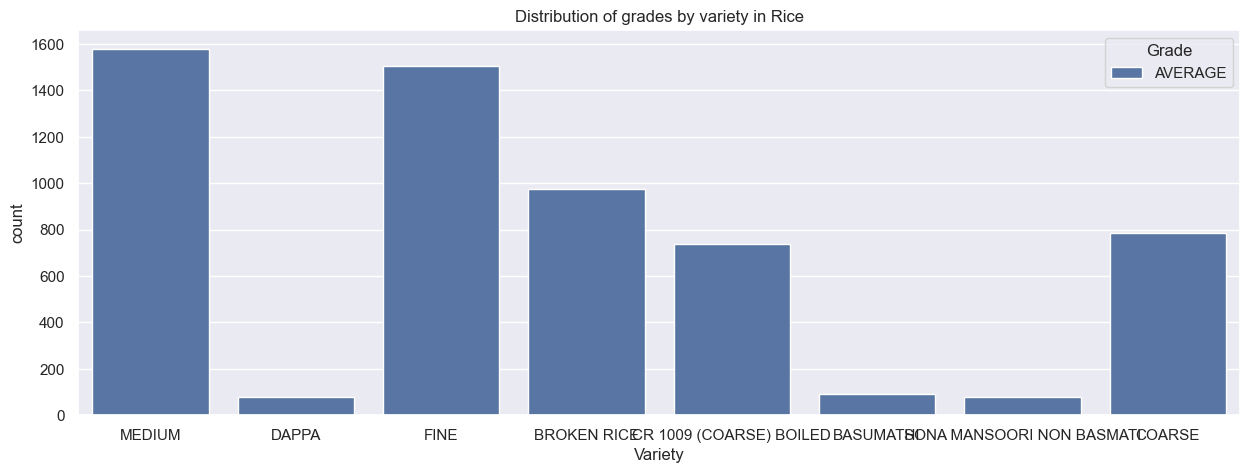

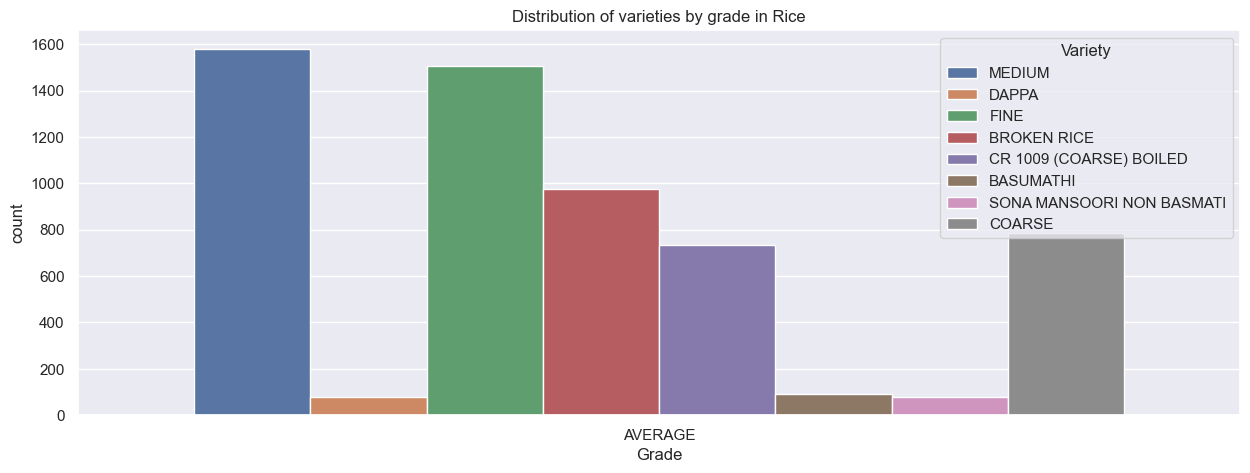

The distribution of grades by variety and vareity by grades in Green Peas


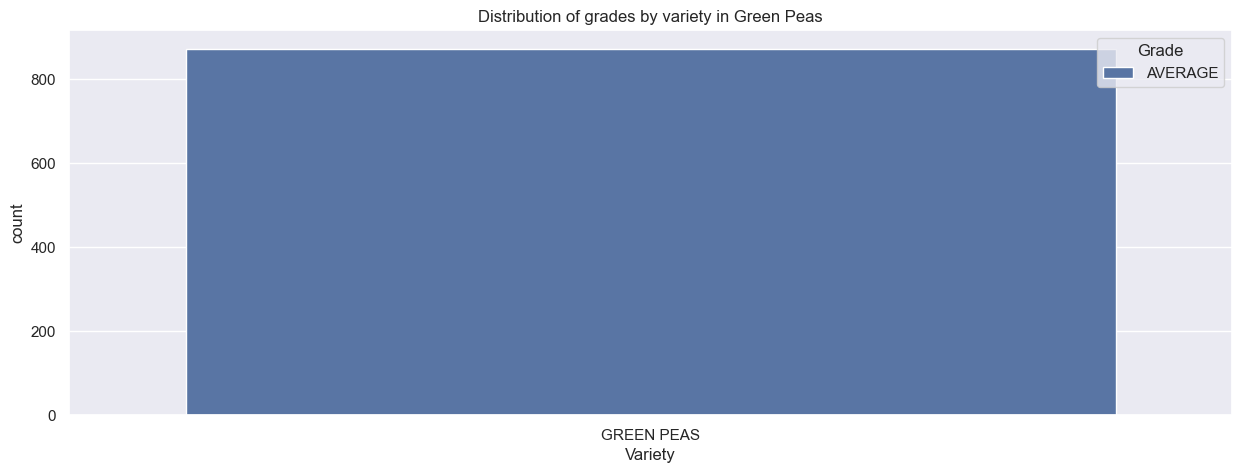

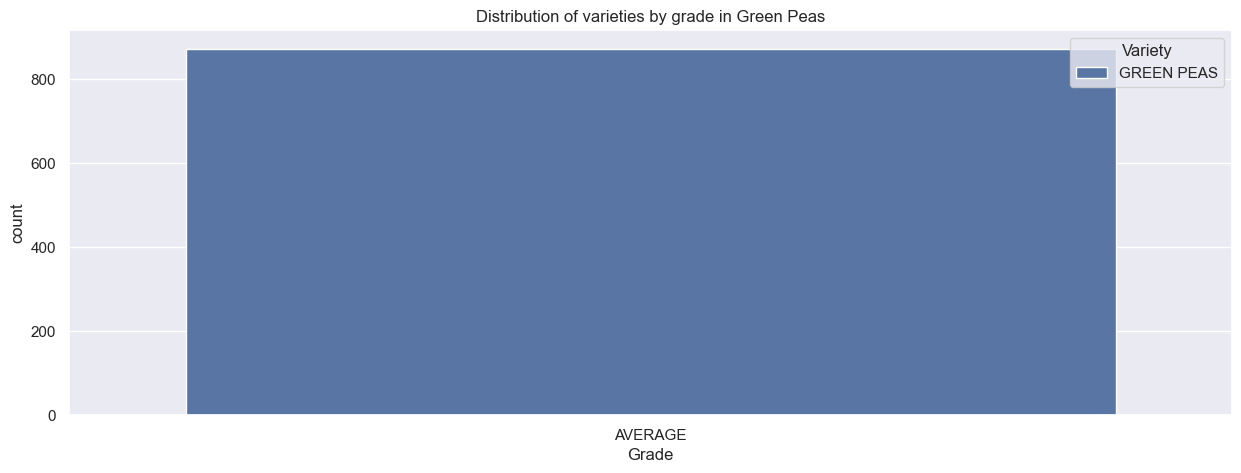

In [96]:
# Similarly the distribution of grades and varieties in the other markets
plot_distribution(rice_df, 'Rice')
plot_distribution(green_peas_df, 'Green Peas')

We can notice that in general the commodities are of grade Average.

## Distribution of prices



### By the month

The distribution of prices by the month of the year in Bengaluru


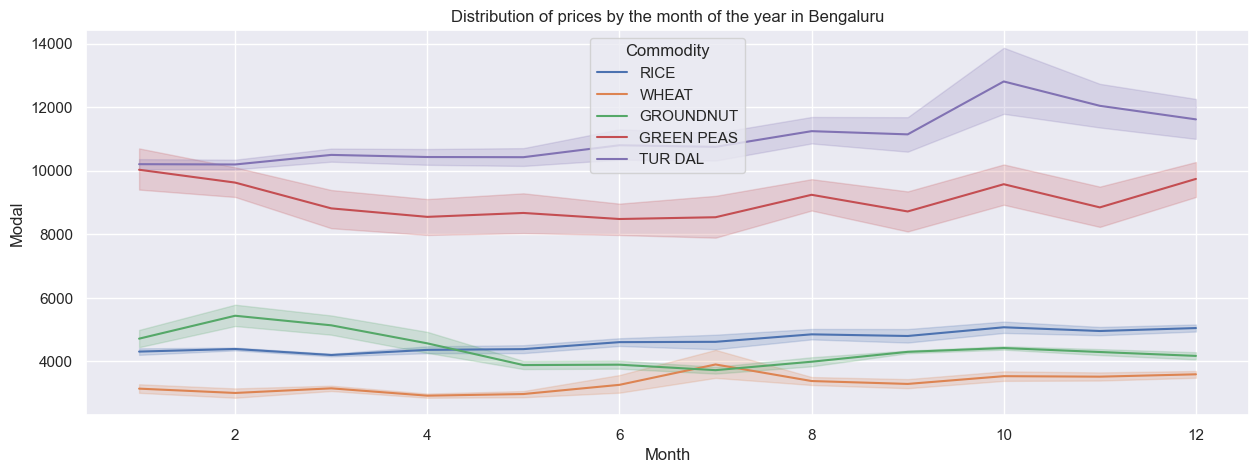

In [97]:
# Distribution of prices by the month of the year
def plot_price_distribution(df, market, hue=None):
    print('The distribution of prices by the month of the year in', market)
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.lineplot(x='Month', y='Modal', data=df, hue=hue, legend='full')
    plt.title(f'Distribution of prices by the month of the year in {market}')
    plt.show()
plot_price_distribution(bengaluru_df, 'Bengaluru', hue='Commodity')

- Groundnut can be sold at a higher price during Feb and Tur Dal during Oct.
- July is a good month for selling Wheat
- Prices are stable for Rice throughout the year not favouring any particular month
- Green Peas can be sold for the highest price at December

The distribution of prices by the month of the year in Rice


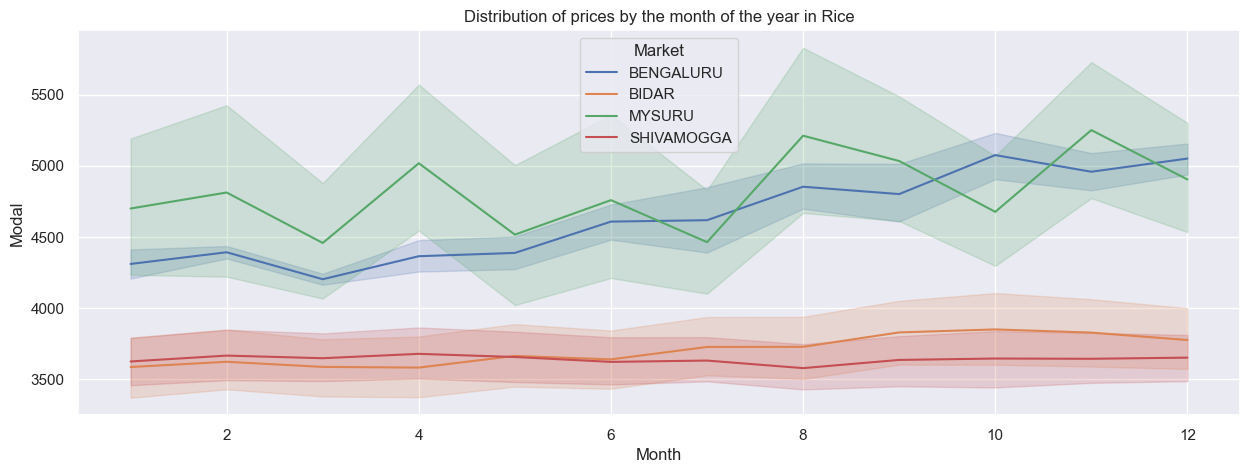

In [98]:
# Rice
plot_price_distribution(rice_df, 'Rice', hue='Market')

- Mysuru Market prices fluctuate over the months
- Bengaluru prices steadily increase over the year
- Bidar and Shivamogga are comparatively stable over the months

The distribution of prices by the month of the year in Green Peas


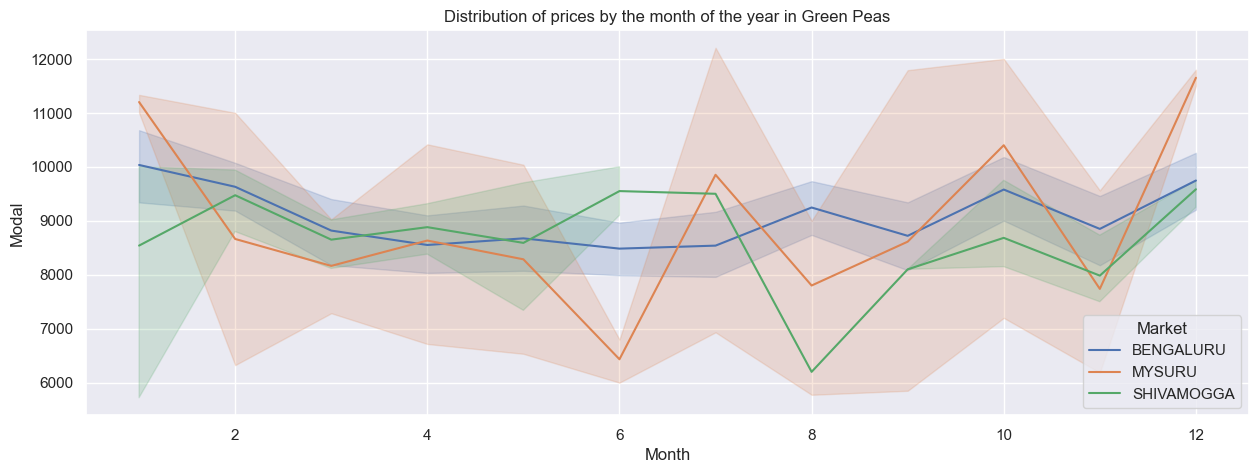

In [99]:
# Green Peas
plot_price_distribution(green_peas_df, 'Green Peas', hue='Market')

- Generally it can be sold at a high price during December without much Variance in price

### By the year

The distribution of prices by the year in Bengaluru


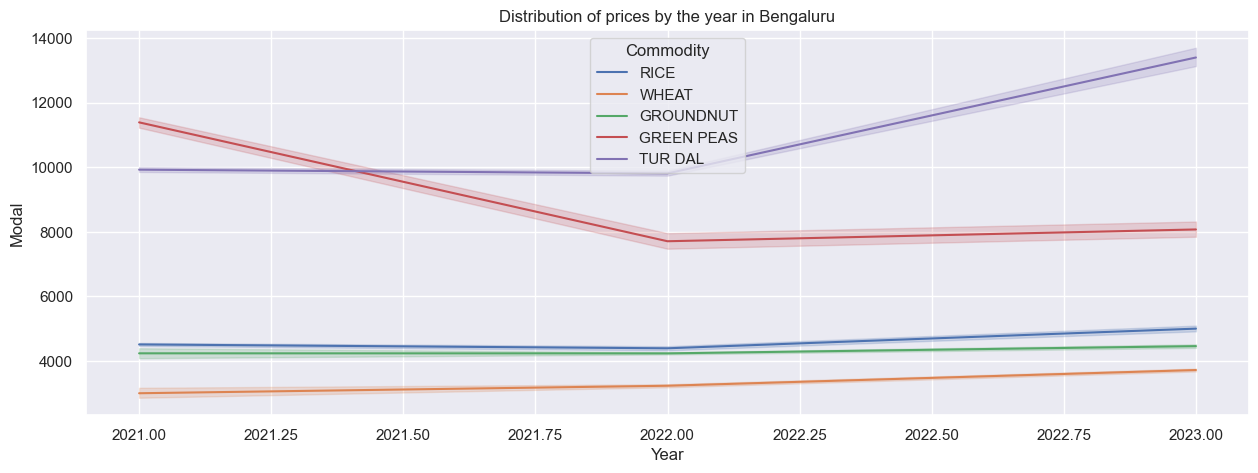

In [100]:
def plot_price_distribution_by_year(df, market, hue=None):
    print('The distribution of prices by the year in', market)
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.lineplot(x='Year', y='Modal', data=df, hue=hue, legend='full')
    plt.title(f'Distribution of prices by the year in {market}')
    plt.show()

plot_price_distribution_by_year(bengaluru_df, 'Bengaluru', hue='Commodity')

- Green Peas prices reduced while others increased over the 2 years

The distribution of prices by the year in Rice


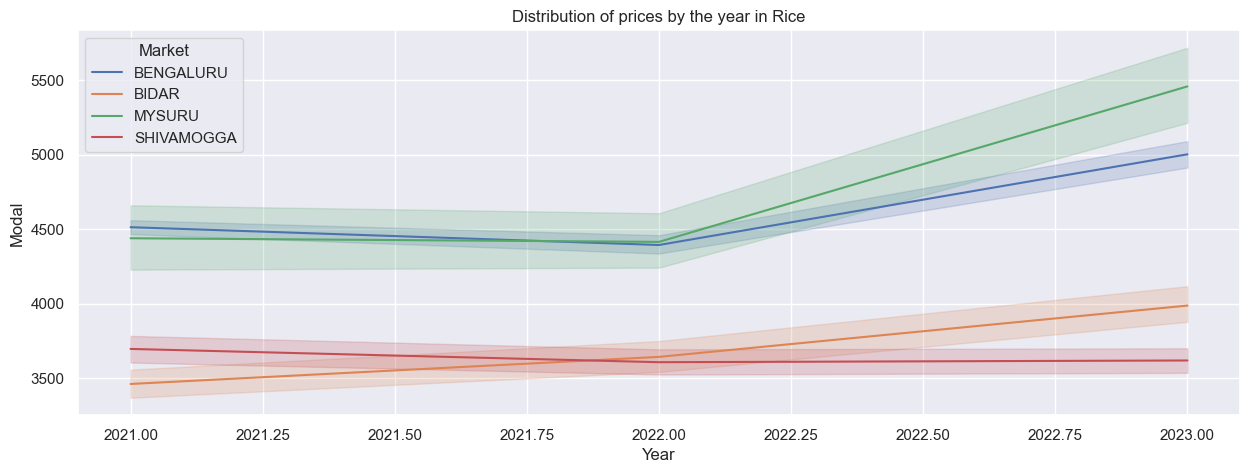

In [101]:
# Rice
plot_price_distribution_by_year(rice_df, 'Rice', hue='Market')

The distribution of prices by the year in Green Peas


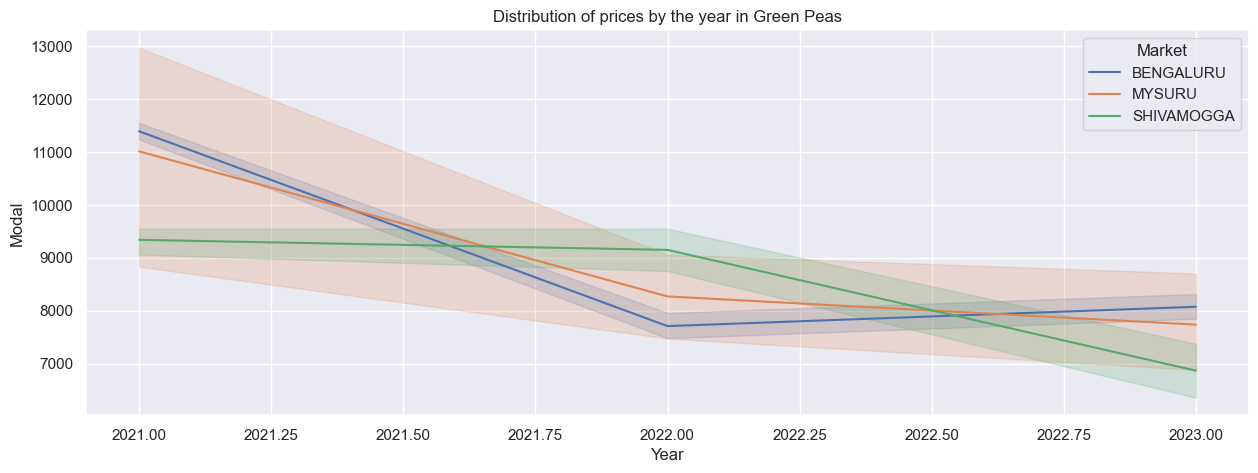

In [102]:
# Green Peas
plot_price_distribution_by_year(green_peas_df, 'Green Peas', hue='Market')

- Prices declined over these 2 years

### By the date of the month

The distribution of prices by the day of the month in Bengaluru


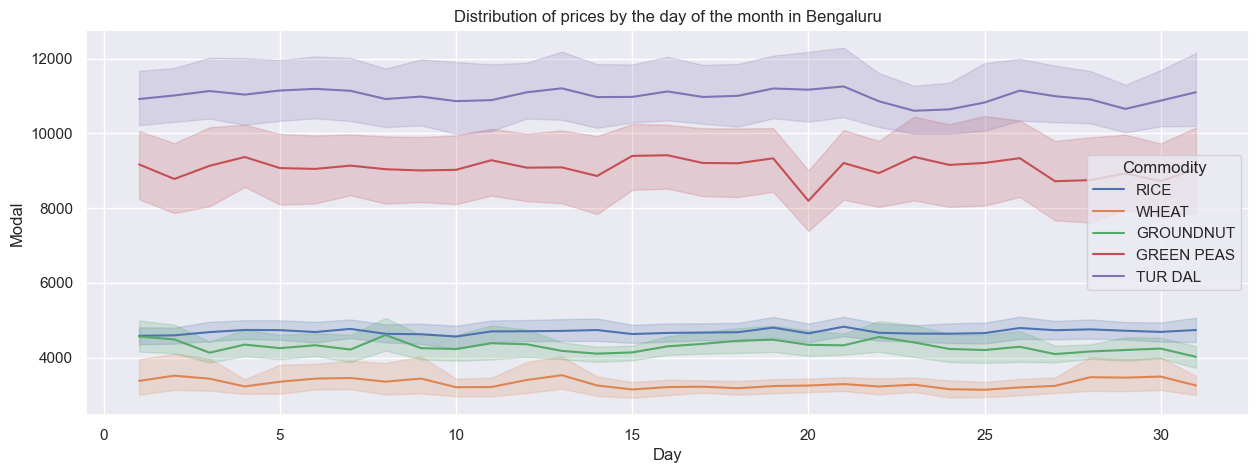

In [103]:
def plot_price_distribution_by_day(df, market, hue=None):
    print('The distribution of prices by the day of the month in', market)
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.lineplot(x='Day', y='Modal', data=df, hue=hue, legend='full')
    plt.title(f'Distribution of prices by the day of the month in {market}')
    plt.show()
    
plot_price_distribution_by_day(bengaluru_df, 'Bengaluru', hue='Commodity')

There are no obvious patterns in the prices by the date of the month.
- 20th seems like an undesirable day to sell Green Peas

The distribution of prices by the day of the month in Rice


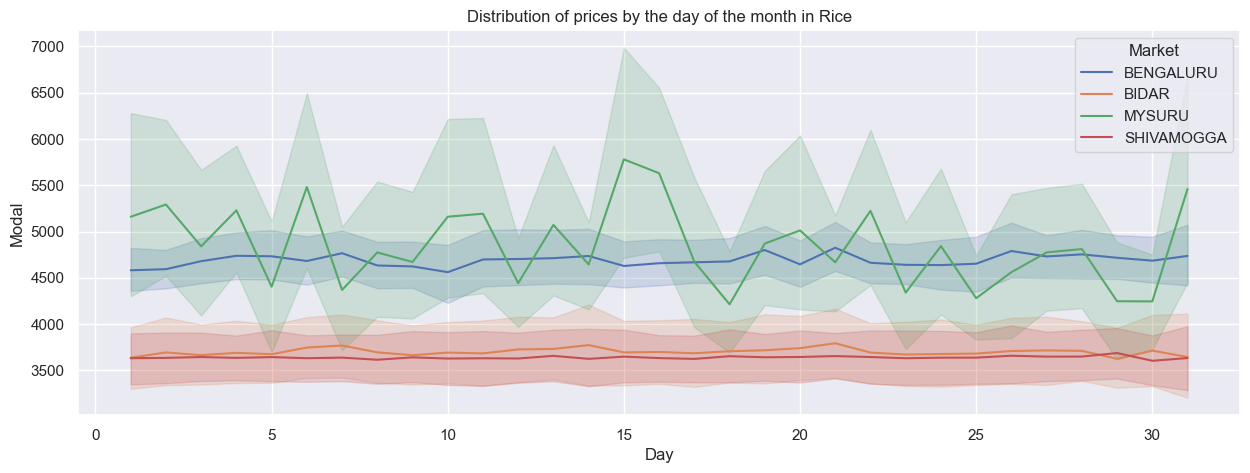

In [104]:
# Rice
plot_price_distribution_by_day(rice_df, 'Rice', hue='Market')

- Mysuru Prices are fluctuating a lot on day by day basis

The distribution of prices by the day of the month in Green Peas


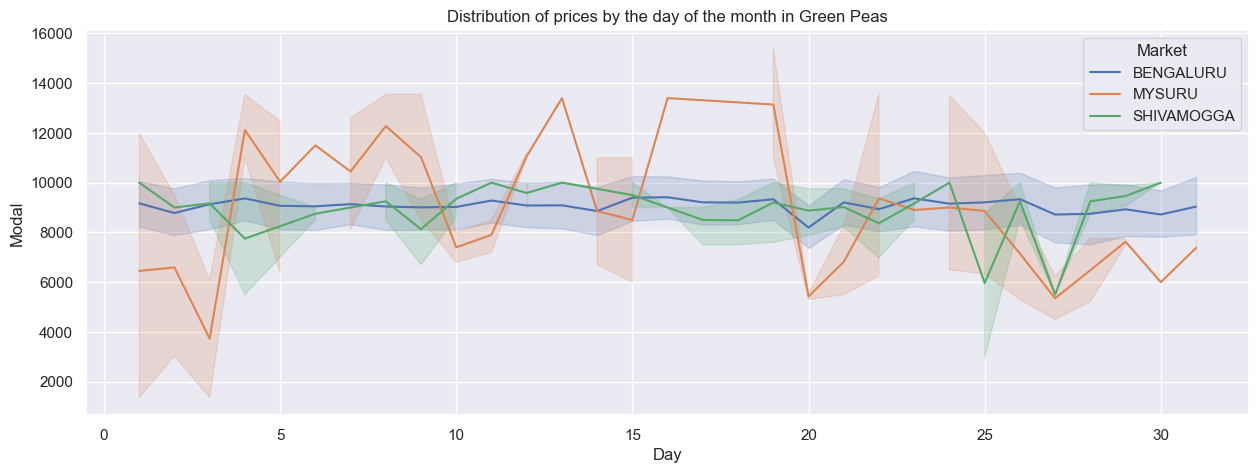

In [105]:
# Green Peas
plot_price_distribution_by_day(green_peas_df, 'Green Peas', hue='Market')

Not enough data to gain insights

### By the day of the week


The distribution of prices by the day of the week in Bengaluru


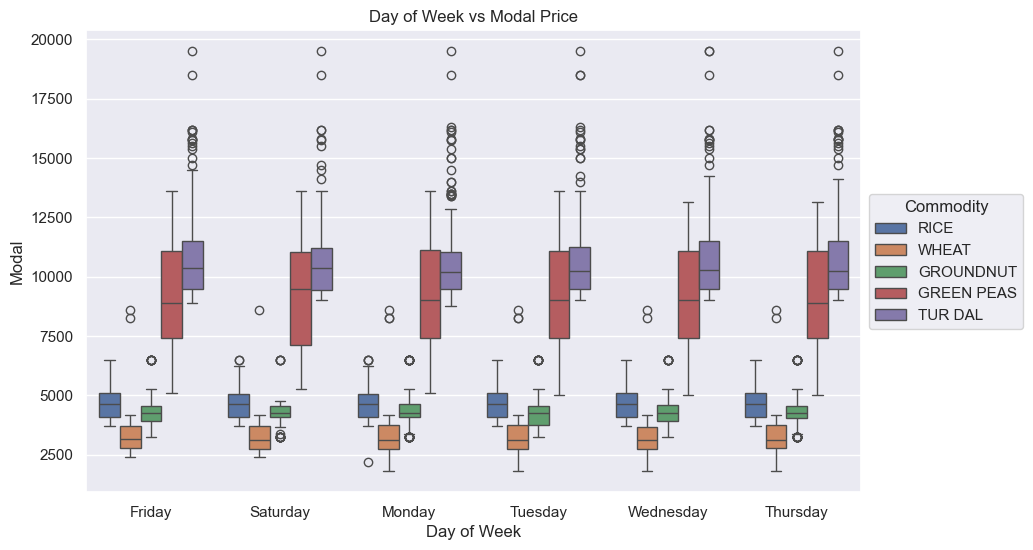

In [106]:
def plot_day_of_week(df, market, hue=None):
    print('The distribution of prices by the day of the week in', market)
    df['Day of Week'] = df['Date'].dt.dayofweek
    df['Day of Week'] = df['Day of Week'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
    plt.figure(figsize=(10,6))
    ax = sns.boxplot(x='Day of Week', y='Modal', data=df, hue=hue)
    plt.title('Day of Week vs Modal Price')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=hue)
    plt.show()

plot_day_of_week(bengaluru_df, 'Bengaluru', hue='Commodity')


We can see that the prices do not change much over the week even during weekends.

The distribution of prices by the day of the week in Rice


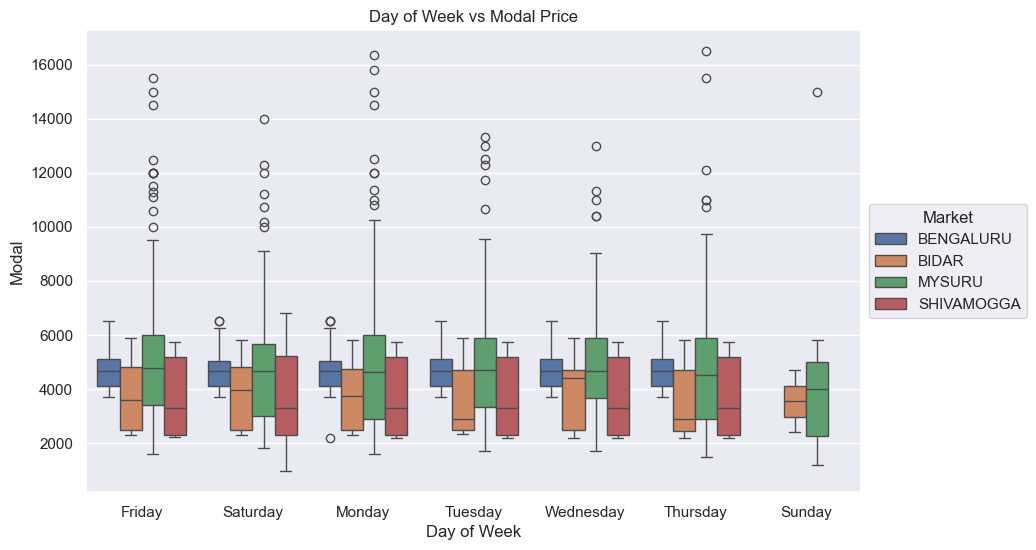

In [107]:
# Rice
plot_day_of_week(rice_df, 'Rice', hue='Market')

The distribution of prices by the day of the week in Green Peas


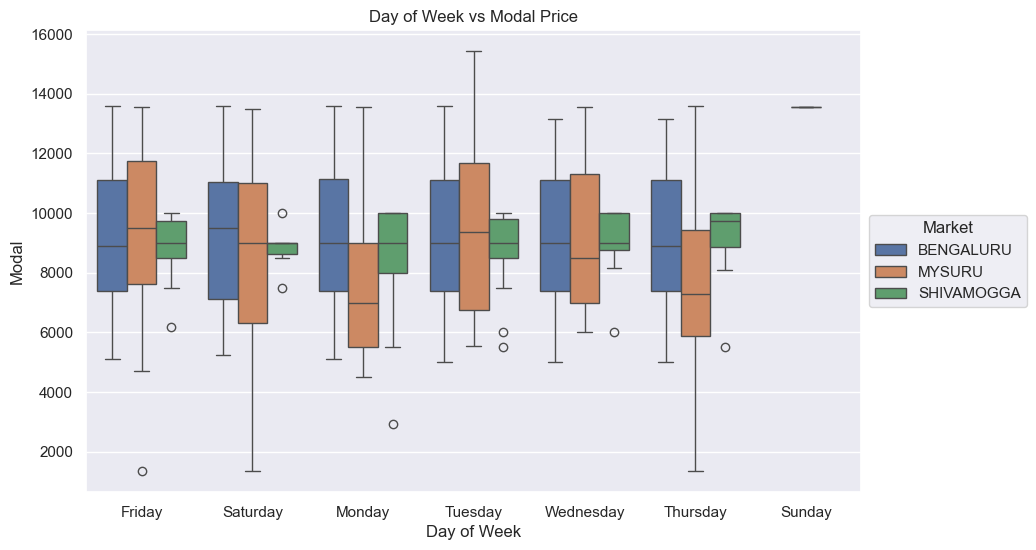

In [108]:
# Green Peas
plot_day_of_week(green_peas_df, 'Green Peas', hue='Market')

- Bengaluru is a better choice on Thursdays

## Variety and Grade wise prices

### Variety wise prices

The distribution of prices by the variety in Bengaluru


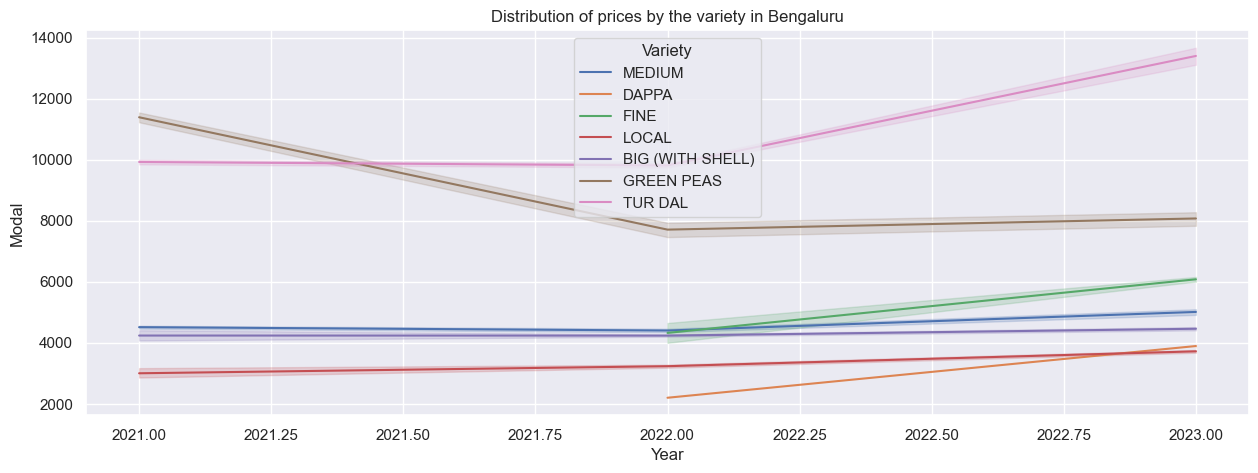

In [109]:
# Distribution of prices by the variety
def plot_price_distribution_by_variety(df, market):
    print('The distribution of prices by the variety in', market)
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.lineplot(x='Year', y='Modal', hue='Variety', data=df)
    plt.title(f'Distribution of prices by the variety in {market}')
    plt.show()

plot_price_distribution_by_variety(bengaluru_df, 'Bengaluru')


### Grade wise prices

The distribution of prices by the grade in Bengaluru


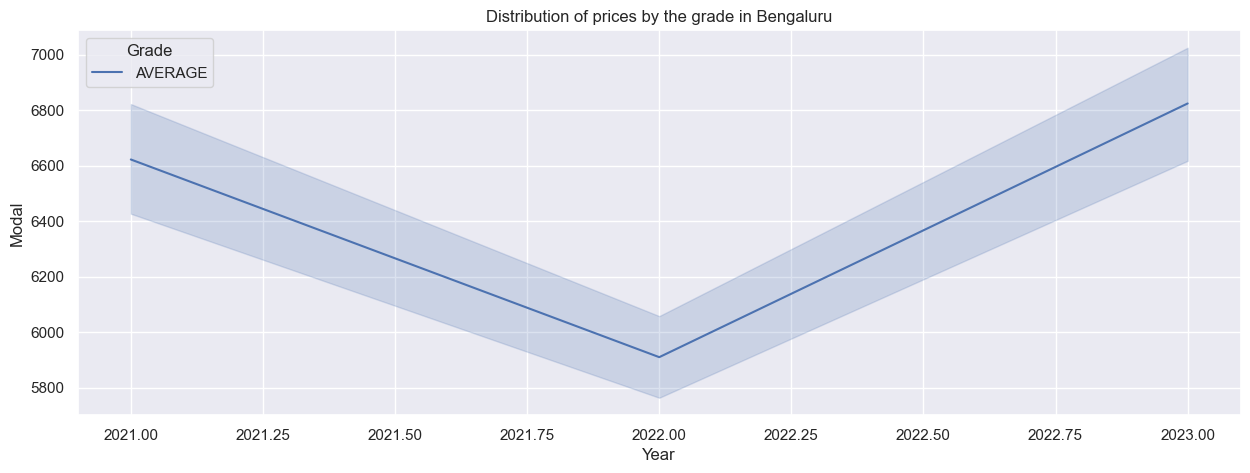

In [110]:
# Distribution of prices by the grade
def plot_price_distribution_by_grade(df, market):
    print('The distribution of prices by the grade in', market)
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.lineplot(x='Year', y='Modal', hue='Grade', data=df)
    plt.title(f'Distribution of prices by the grade in {market}')
    plt.show()

plot_price_distribution_by_grade(bengaluru_df, 'Bengaluru')

The distribution of prices by the grade in Rice


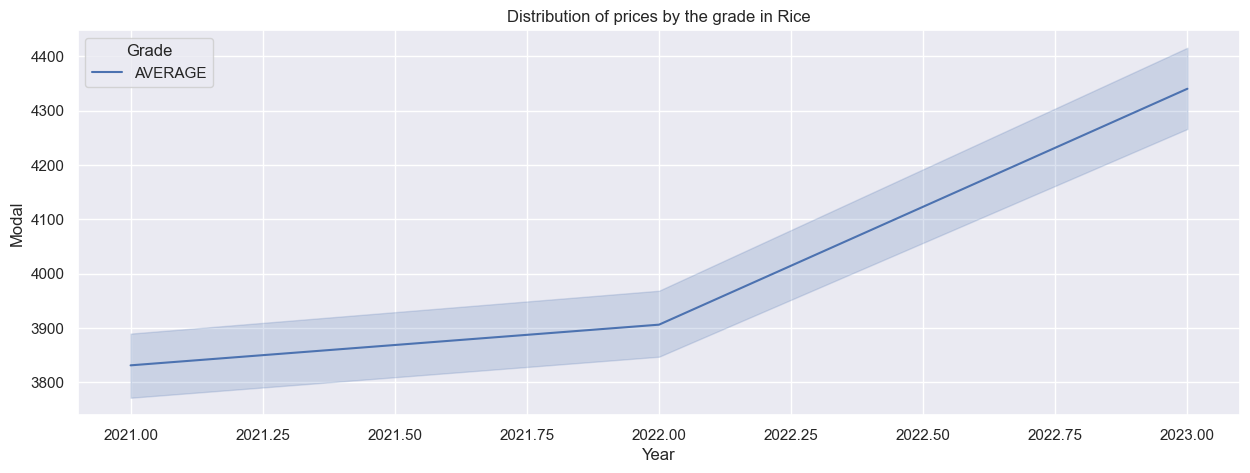

In [111]:
# Rice
plot_price_distribution_by_grade(rice_df, 'Rice')

## Additional Data Visualizations

To gain deeper insights into the data, we can explore additional visualizations.

### Heatmap of Correlations
A heatmap can help us understand the correlation between different numerical features in the dataset.

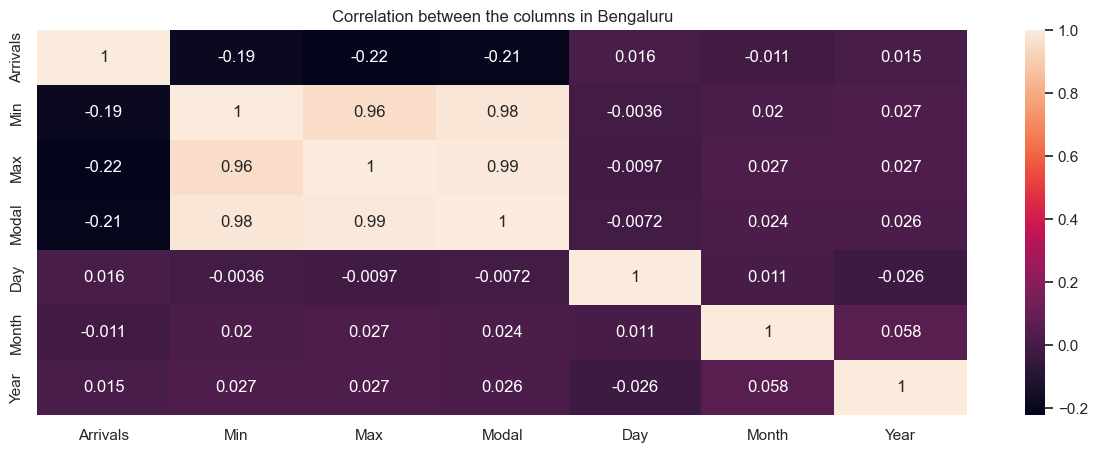

In [112]:
# heatmap of the correlation between the columns
sns.heatmap(bengaluru_df.corr(numeric_only=True), annot=True)
plt.title('Correlation between the columns in Bengaluru')
plt.show()

We can see the correlation between Min, Max and Modal is high which means if the minimum price is high, the modal price is also high and they increase together.

### Histogram of Prices
A histogram can show the distribution of prices, helping to understand the frequency and spread of price of commodities.

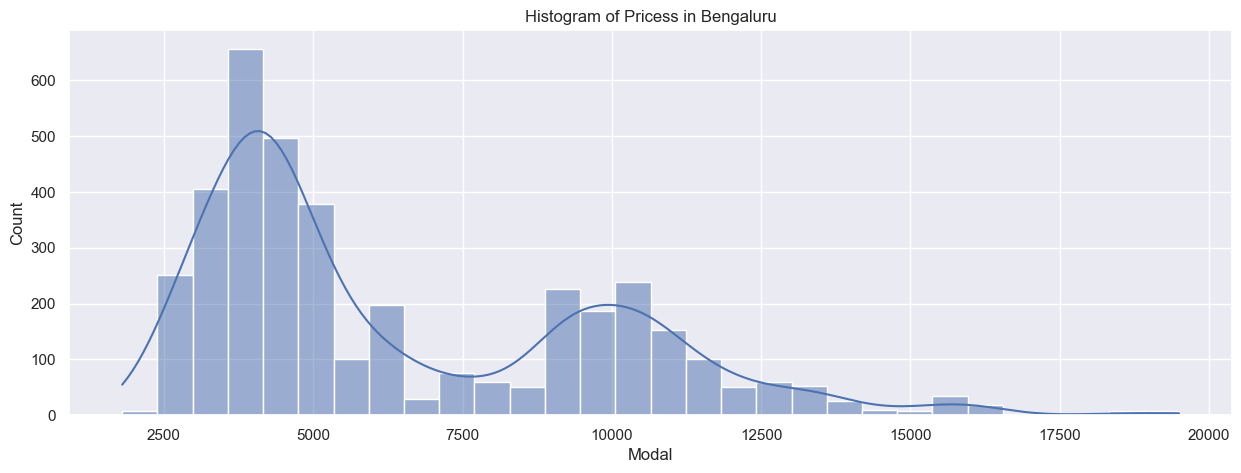

In [113]:
# Histogram of Prices
sns.histplot(bengaluru_df['Modal'], bins=30, kde=True)
plt.title('Histogram of Pricess in Bengaluru')
plt.show()

Majority of the arrivals are in the range of 0 to 10,000.

### Scatter Plot of Min vs. Max Prices
A scatter plot can show the relationship between the minimum and maximum prices, helping to identify any potential patterns or anomalies.

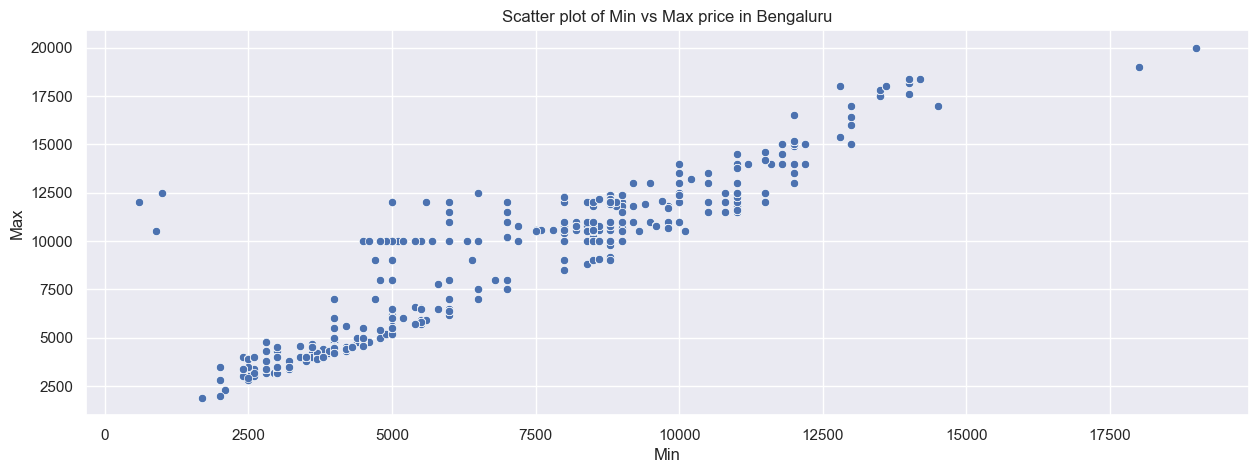

In [114]:
# Scatter plot of Min vs Max price
sns.scatterplot(x='Min', y='Max', data=bengaluru_df)
plt.title('Scatter plot of Min vs Max price in Bengaluru')
plt.show()

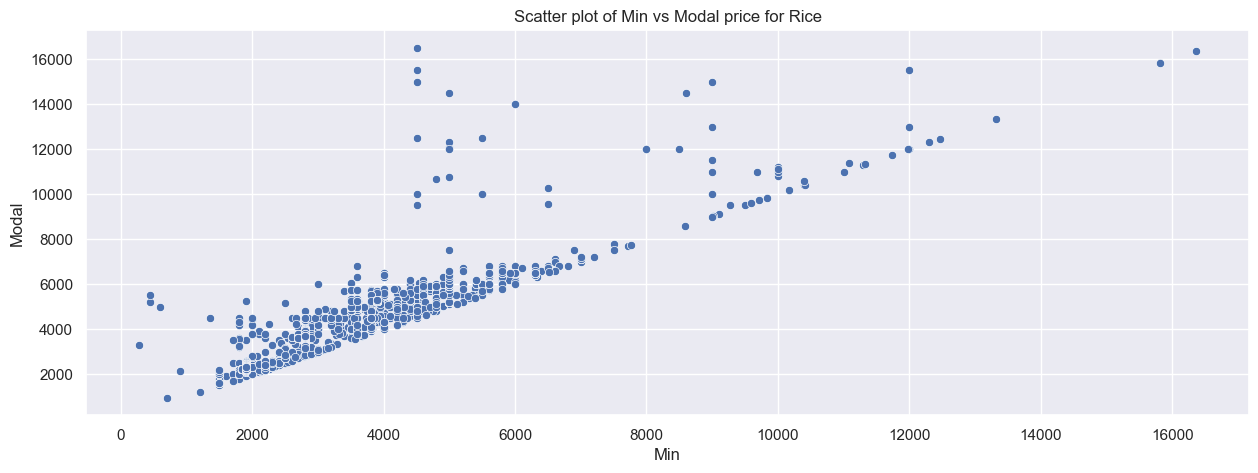

In [115]:
# Scatter plot of Min vs Modal price for Rice df
sns.scatterplot(x='Min', y='Modal', data=rice_df)
plt.title('Scatter plot of Min vs Modal price for Rice')
plt.show()

# Conclusion

Through the data visualizations, we were able to gain insights into the data and understand the distribution of prices, arrivals, and other features.

These insights can help us understand the data better and help farmers make informed decisions based on the trends and patterns observed in the data.